In [92]:
import json
import numpy as np
import requests as r
import pandas as pd
from datetime import date
from datetime import datetime

code_list = ["HSI","0005","0011","0388","0939","1299","1398","2318","2388","2628","3328","3988"]
url_list = [f'%5EHSI', '0005.HK', '0011.HK', '0388.HK', '0939.HK', '1299.HK', '1398.HK', '2318.HK', '2388.HK', '2628.HK', '3328.HK', '3988.HK']
day_b10 = int(datetime(int(date.today().strftime("%Y"))-10,int(date.today().strftime("%m")),int(date.today().strftime(f"%d"))).timestamp())
today = int(datetime(int(date.today().strftime("%Y")),int(date.today().strftime("%m")),int(date.today().strftime(f"%d"))+1).timestamp())

for i in range(len(code_list)) :
        url = (f"https://query1.finance.yahoo.com/v8/finance/chart/{url_list[i]}?symbol={url_list[i]}&period1={day_b10}&period2={today}&useYfid=true&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=c0iNuYsQEnn&corsDomain=finance.yahoo.com")
        header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
        res = r.get(url,headers=header)
        content = json.loads(res.text)

        date1 = content['chart']['result'][0]['timestamp']
        date2 = [date.fromtimestamp(date1[j]).strftime(f"%Y-%m-%d") for j in range(len(date1))]
        open = content['chart']['result'][0]['indicators']['quote'][0]['open']
        close = content['chart']['result'][0]['indicators']['quote'][0]['close']
        adjclose = content['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']
        high = content['chart']['result'][0]['indicators']['quote'][0]['high']
        low = content['chart']['result'][0]['indicators']['quote'][0]['low']
        volume = content['chart']['result'][0]['indicators']['quote'][0]['volume']

        ###Count the day of "close" and "adjclose" are different.
        #n = 0
        #nl = []
        #for k in range(len(close)) :
        #    if close[k] == adjclose[k]:
        #        continue
        #    else :
        #       n += 1
        #       nl.append(date2[k])
        #if n != 0 :
        #        print(f'''There are {n} days data difference between "close" and "adjclose" in {co_list[i]}.''')

        d = {"date": date2, "open": open, "close": close, "high": high, "low": low, "volume": volume}
        df = pd.DataFrame(d)[::-1]

        rate1 = (df.loc[:,"close"].values[:-1]-df.loc[:,"close"].values[1:])/df.loc[:,"close"].values[1:]*100
        rate2 = np.array([0])
        mix_rate = np.append(rate1,rate2)
        df["rate%"] = mix_rate.tolist()
        df["difference"] = df["high"]-df["low"]

        df.drop(df[df['close'].isnull()].index, inplace=True)
        df.drop(df[(df['volume']==0)&(df['rate%']==0)].index, inplace=True)

        x = df.pop("rate%")
        df.insert(3,"rate%",x)
        x = df.pop("difference")
        df.insert(6,"difference",x)

        if i == 0 :
                df_HSI = df
        elif i == 1 :
                df_0005 = df
        elif i == 2 :
                df_0011 = df
        elif i == 3 :
                df_0388 = df
        elif i == 4 :
                df_0939 = df
        elif i == 5 :
                df_1299 = df
        elif i == 6 :
                df_1398 = df
        elif i == 7 :
                df_2318 = df
        elif i == 8 :
                df_2388 = df
        elif i == 9 :
                df_2628 = df
        elif i == 10 :
                df_3328 = df
        elif i == 11 :
                df_3988 = df
        else :
                print("Check the code.")



name_list = ["Hang Seng Index","HSBC Holdings plc","Hang Seng Bank Ltd","HKEx Limited","China Construction Bank","AIA Group Limited","Industrial and Commercial Bank of China","Ping An Insurance","BOC Hong Kong (Holdings) Ltd","China Life","Bank of Communications Ltd","Bank of China Ltd"]
df_list = [df_HSI,df_0005,df_0011,df_0388,df_0939,df_1299,df_1398,df_2318,df_2388,df_2628,df_3328,df_3988]

def save(code) :
    today = str(date.today().strftime("%Y"))+str(date.today().strftime("%m"))+str(date.today().strftime(f"%d"))
    if code == "all" :
        for i in code_list :
            df_list[code_list.index(i)].to_csv(f"{i}_{today}.csv")
        print("HSI and 11 of it's financials industry sectors stock csv file are saved successfully.")
    elif code not in code_list :
        df_error = pd.DataFrame(list(zip(name_list,code_list)),columns=["Name","code"])
        print(f'''Please type "all" for saving all data frame or input a code from dictionary as below :\n{df_error}''')
    else :
        df_list[code_list.index(code)].to_csv(f"{code}_{today}.csv")
        print(f'''"{code}" stock csv file is saved successfully.''')

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot: xlabel='HSI', ylabel='HSI'>,
        <AxesSubplot: xlabel='0005', ylabel='HSI'>,
        <AxesSubplot: xlabel='0011', ylabel='HSI'>,
        <AxesSubplot: xlabel='0388', ylabel='HSI'>,
        <AxesSubplot: xlabel='0939', ylabel='HSI'>,
        <AxesSubplot: xlabel='1299', ylabel='HSI'>,
        <AxesSubplot: xlabel='1398', ylabel='HSI'>,
        <AxesSubplot: xlabel='2318', ylabel='HSI'>,
        <AxesSubplot: xlabel='2388', ylabel='HSI'>,
        <AxesSubplot: xlabel='2628', ylabel='HSI'>,
        <AxesSubplot: xlabel='3328', ylabel='HSI'>,
        <AxesSubplot: xlabel='3988', ylabel='HSI'>],
       [<AxesSubplot: xlabel='HSI', ylabel='0005'>,
        <AxesSubplot: xlabel='0005', ylabel='0005'>,
        <AxesSubplot: xlabel='0011', ylabel='0005'>,
        <AxesSubplot: xlabel='0388', ylabel='0005'>,
        <AxesSubplot: xlabel='0939', ylabel='0005'>,
        <AxesSubplot: xlabel='1299', ylabel='0005'>,
        <AxesSubplot: xlabel='1398', ylabel='0005'>,
      

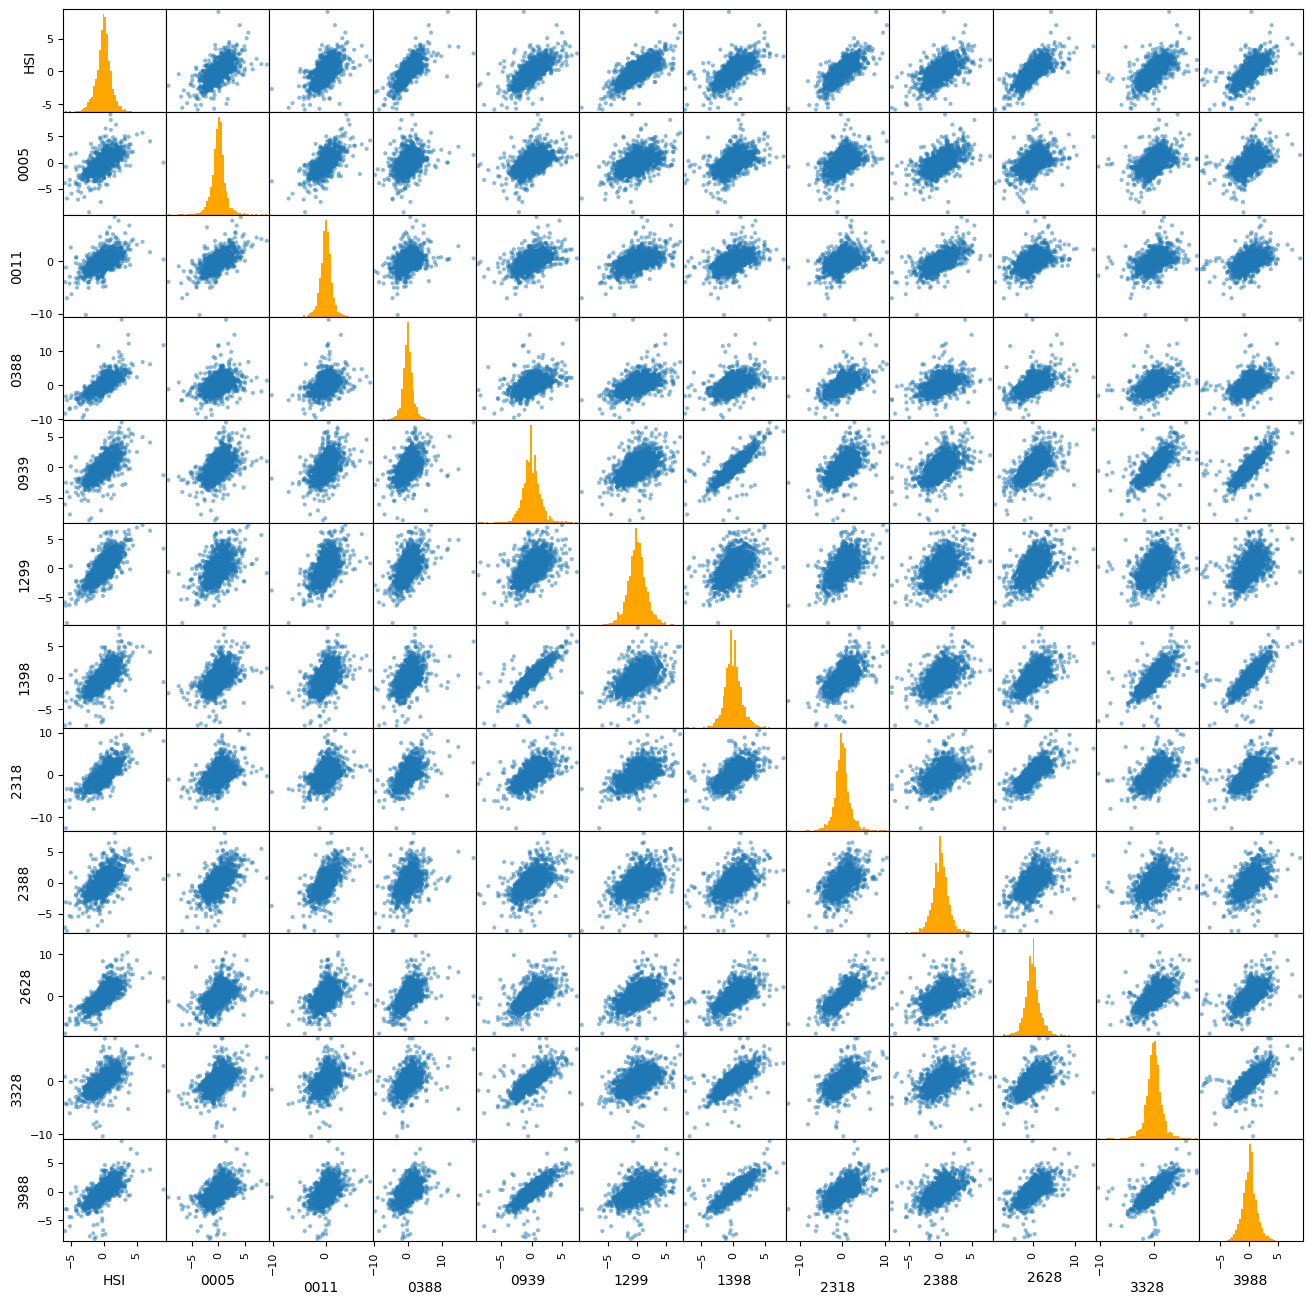

In [94]:
# framework in pandas that allows us to work easily with scatter matrices
# combining with the daily percentage change of all the stocks
# Scatter matrices can determine if there is a linear correlation with two variables. 
# The above graph is the combination of histograms for each company and a subsequent scattered plot taking 3 companies’ stocks at a time. 
# the plots in the lower triangular area are the same as the plots in the upper triangular area with just axes interchanged. 
# So, analyzing either set of plots would suffice.

from pandas.plotting import scatter_matrix

box_df = pd.concat([df_HSI['rate%'], df_0005['rate%'], df_0011['rate%'], df_0388['rate%'], df_0939['rate%'],df_1299['rate%'],df_1398['rate%'],df_2318['rate%'],df_2388['rate%'],df_2628['rate%'],df_3328['rate%'], df_3988['rate%']],axis = 1)
box_df.columns = ['HSI','0005', '0011','0388','0939', '1299', '1398', '2318', '2388','2628', '3328','3988'] 
scatter_matrix(box_df, figsize = (16,16), hist_kwds={'bins':50,'color':'orange'})


<Figure size 640x480 with 0 Axes>

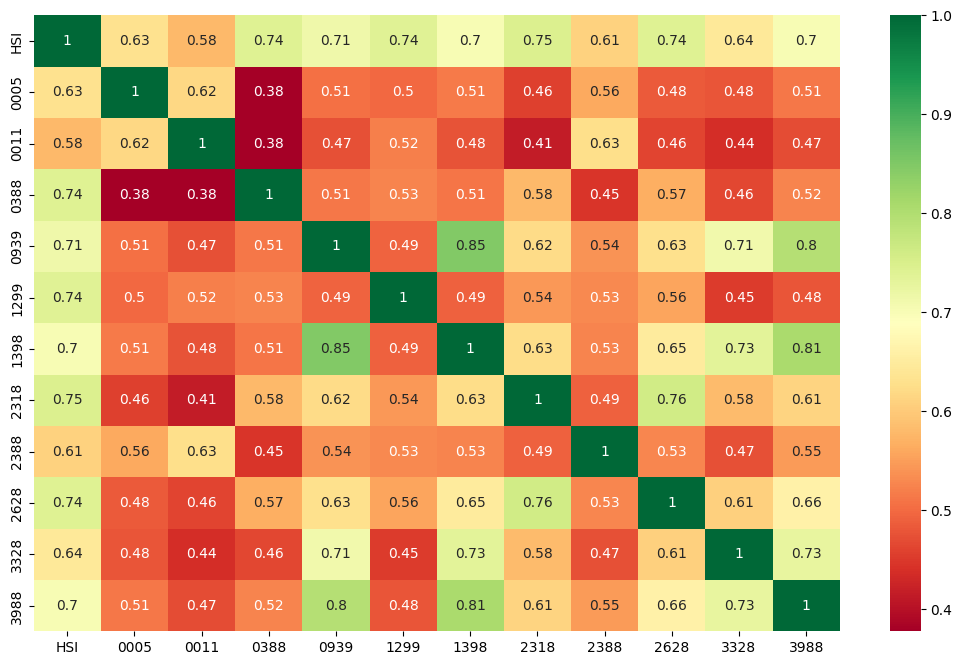

<Figure size 640x480 with 0 Axes>

In [95]:
# framework in seaborn that allows us to work easily with heatmap.
# Green color depicts
# From the graph, we can clearly figure out that the pair 1398 and 0939 has the highest a linear correlation.
# Followed by 0939&3988 and 1398&3988. Their values are around 0.8

corr_df = box_df.corr(method='pearson')

plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

In [96]:
corr_df = box_df.corr(method='pearson')

corr_df.apply(lambda row: row[row >= 0.8].index, axis=1)



HSI                      Index(['HSI'], dtype='object')
0005                    Index(['0005'], dtype='object')
0011                    Index(['0011'], dtype='object')
0388                    Index(['0388'], dtype='object')
0939            Index(['0939', '1398'], dtype='object')
1299                    Index(['1299'], dtype='object')
1398    Index(['0939', '1398', '3988'], dtype='object')
2318                    Index(['2318'], dtype='object')
2388                    Index(['2388'], dtype='object')
2628                    Index(['2628'], dtype='object')
3328                    Index(['3328'], dtype='object')
3988            Index(['1398', '3988'], dtype='object')
dtype: object

In [97]:
df_0005['date'].dtype

dtype('O')

Text(0.5, 1.0, '3 stocks identified')

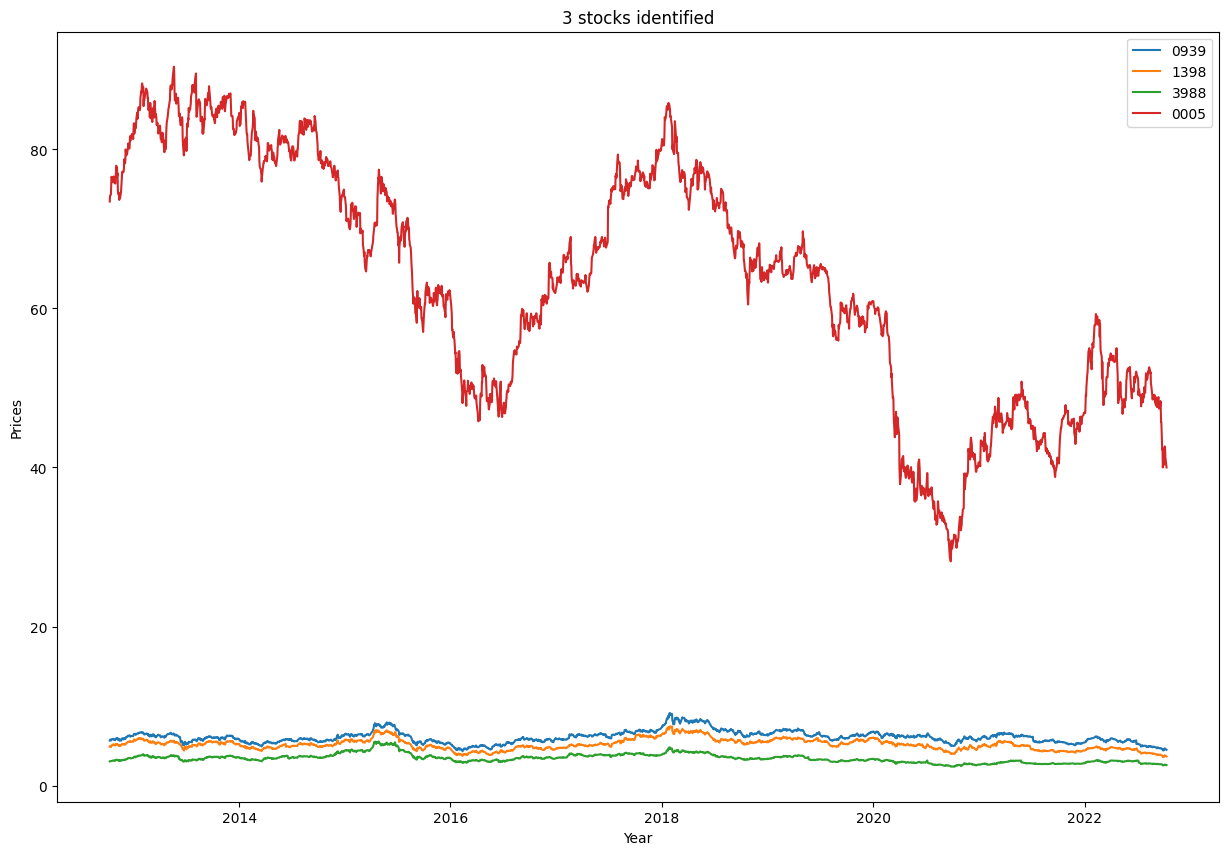

In [98]:
# Matplotlib line plot

# showing simple price movement over the period

figure, axis = plt.subplots()
figure.set_size_inches(15, 10, forward=True)

df_0939['date'] = pd.to_datetime(df_0939['date'])
df_1398['date'] = pd.to_datetime(df_1398['date'])
df_3988['date'] = pd.to_datetime(df_3988['date'])
df_0005['date'] = pd.to_datetime(df_0005['date'])


axis.plot(df_0939['date'], df_0939['close'],label = '0939')
axis.plot(df_1398['date'], df_1398['close'],label = '1398')
axis.plot(df_3988['date'], df_3988['close'],label = '3988')
axis.plot(df_0005['date'], df_0005['close'],label = '0005')

plt.xlabel("Year")
plt.ylabel("Prices")
plt.legend()
axis.set_title("3 stocks identified")

Text(0.5, 1.0, 'Volume of 3 stocks identified vs popular stock HSBC 0005')

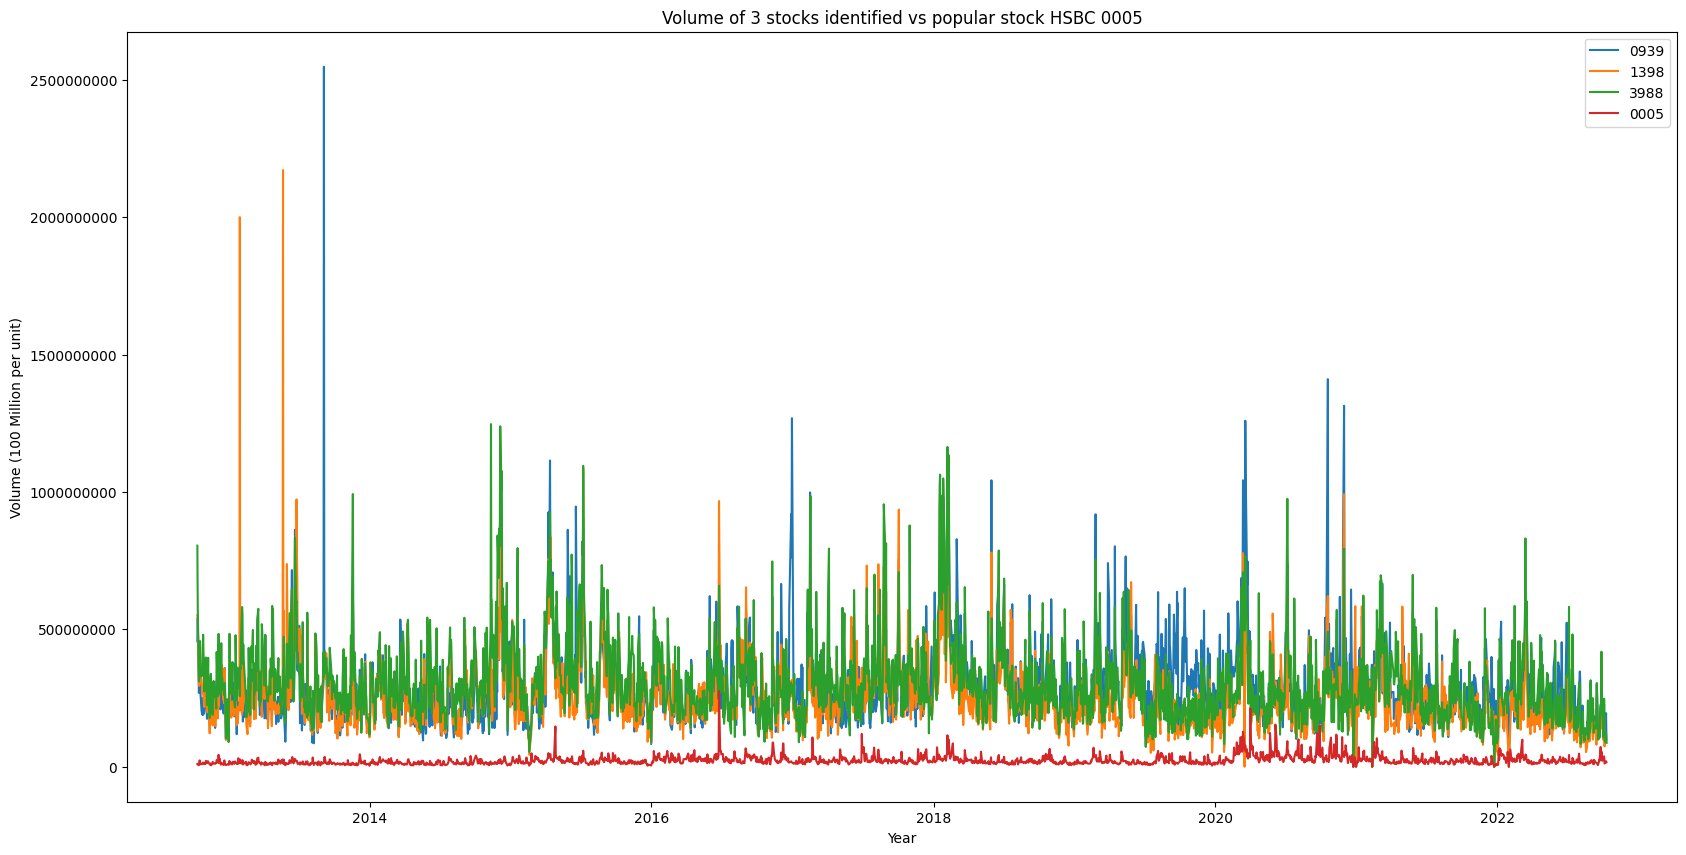

In [99]:

figure, axis = plt.subplots()
figure.set_size_inches(20, 10, forward=True)


axis.plot(df_0939['date'], df_0939['volume'],label = '0939')
axis.plot(df_1398['date'], df_1398['volume'],label = '1398')
axis.plot(df_3988['date'], df_3988['volume'],label = '3988')

axis.plot(df_0005['date'], df_0005['volume'],label = '0005')

axis.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel("Year")
plt.ylabel("Volume (100 Million per unit)")
plt.legend()
axis.set_title("Volume of 3 stocks identified vs popular stock HSBC 0005")

Text(0.5, 1.0, 'Diff stocks boxplot')

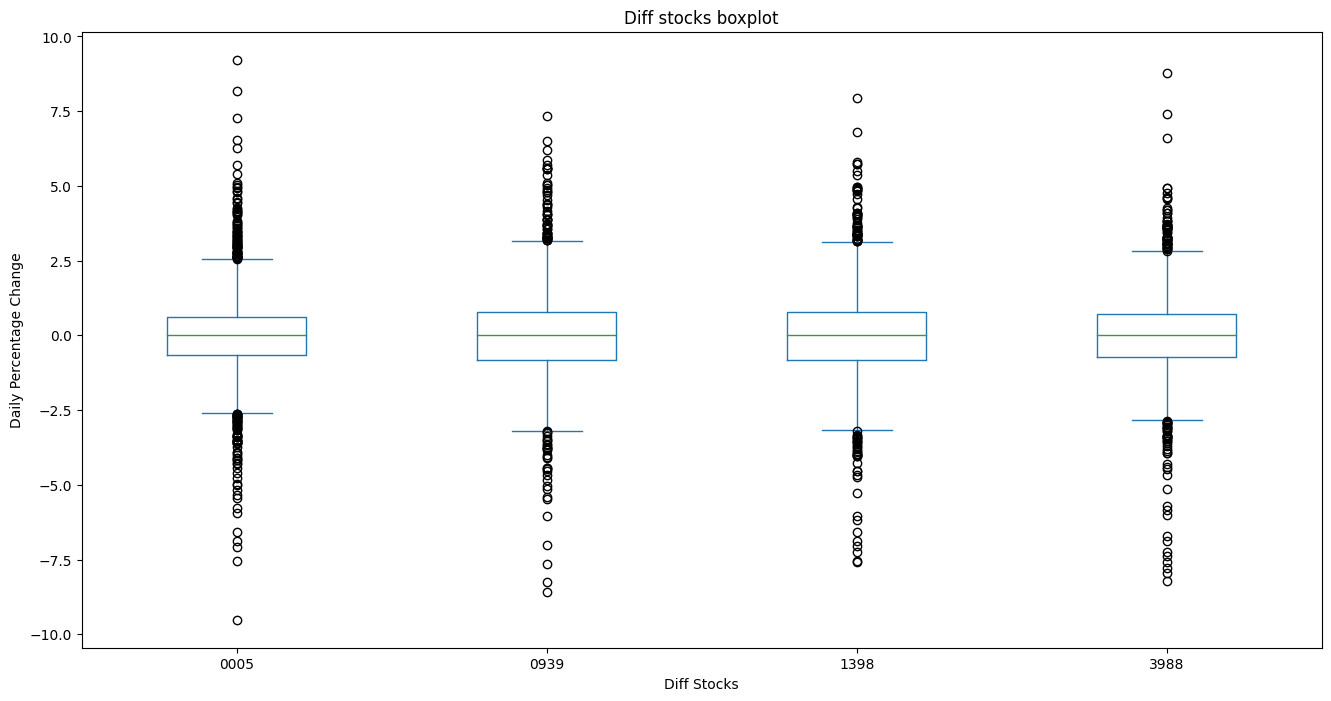

In [100]:
# We will call the pandas box method.
#Percentage increase in stock value is the change in stock comparing that to the previous day. 
#The bigger the value either positive or negative the volatile the stock is. 
# The daily percentage change of 0939 is taller than the others, this means this stock is more volatile.


# Q0/4：(minimum）
# Q1/4:（lower quartile）
# Q2/4：(median）
# Q3/4：(upper quartile）
# Q4/4：(maximum）

# mild ouliner = 1.5 * IQR to 3 * IQR
# extreme ouliner = over 3 * IQR

box_df = pd.concat([df_0005['rate%'],df_0939['rate%'],df_1398['rate%'],df_3988['rate%']],axis=1)

box_df.columns = ['0005','0939','1398', '3988'] 


box_df.plot(kind='box',figsize = (16,8))

plt.xlabel("Diff Stocks")
plt.ylabel("Daily Percentage Change")
plt.title("Diff stocks boxplot")


############# count the numgber of outliners<<<<<<<<<<<<<<<<<<<<<<
# pairtrading more or less 



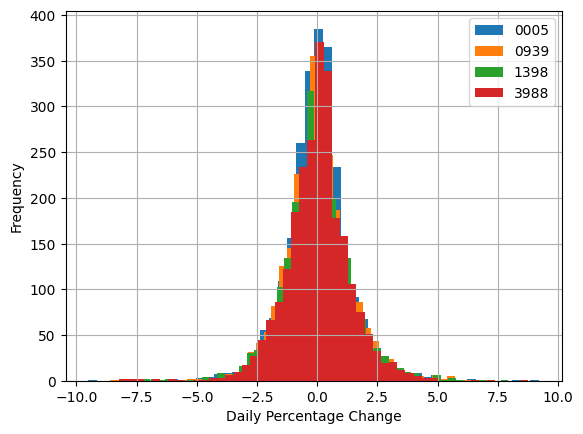

In [101]:
#we plot out the histogram using the .hist method and we also specify the number of bins we want. 
# The thicker our histogram is the more volatile the stock is.
# The width of the histogram shape is related to the standard deviation of the distribution. 
# It is clear from the graph that the percentage increase in stock price histogram for 0939 is the widest , followed by 1398
# which indicates the stock is the most volatile among the three companies compared.



df_0005['rate%'].hist(bins = 50, label='0005')
df_0939['rate%'].hist(bins = 50, label='0939')
df_1398['rate%'].hist(bins = 50, label='1398')
df_3988['rate%'].hist(bins = 50, label='3988')

plt.xlabel("Daily Percentage Change")
plt.ylabel("Frequency")

plt.legend()

In [102]:
# Count the number of time of these pairs going in diff directions

In [103]:
# •	Aim - What are you doing
    # Idetifying a pair of stocks to perform pair trading.
    # With more volatility relatively compared to other stocks, potentially more profits
    # With high liquidity/high trading – easy to trade at any time
    # Pair Trading does a good job at eliminating market-wide risk that allows you to remain market neutral.

#	Business Value - Why are you doing this
    #When a pair trade performs as expected,the investor profits
    #Profits are generated when the underperforming security regains value, and the outperforming security’s price deflates. 
    #The net profit is the total gained from the two positions.

# Example : 
          
          #To illustrate the potential profit of the pairs trade strategy, consider Stock A and Stock B, which have a high correlation of 0.95. 
          # The two stocks deviate from their historical trending correlation in the short-term, with a correlation of 0.50.
          #The arbitrage trader steps in to take a dollar matched the long position on underperforming Stock A and a short position on outperforming Stock B. 
          #The stocks converge and return to their 0.95 correlation over time. The trader profits from a long position and closed short position.         


#	Data Collection - Website, How (Webscraping/API, libraries used)
#	Data Preprocessing - briefly what you did for cleaning up the data, final DF
#	Insight Analysis
#	Challenges, Limitations, and Next Steps
#	Conclusion

In [104]:
# Studying only these 3 pairs
# 0939 & 1398, 1398 & 3988, 0939 & 3988

In [105]:
consol_rate = pd.concat([df_HSI['date'], df_0939['rate%'], df_1398['rate%'], df_3988['rate%']], axis =1)
consol_rate.columns = ['Date','0939_rate', '1398_rate','3988_rate'] 

df6 = consol_rate

df6

,Date,0939_rate,1398_rate,3988_rate
2464,2022-10-11,-0.662256,-1.081080,-0.769230
2463,2022-10-10,-1.521733,-1.333332,-0.763358
2462,2022-10-07,-1.075273,-0.793650,-0.380237
2461,2022-10-06,-0.641020,-0.787401,-0.378788
2460,2022-10-05,4.932731,4.958673,3.529418
...,...,...,...,...
4,2012-10-17,1.760570,1.844256,0.325733
3,2012-10-16,-1.899830,-1.214574,-0.324675
2,2012-10-15,0.520829,-0.403225,0.325733
1,2012-10-12,1.766791,1.431496,0.986841


In [106]:
# Example of counting daily pair trading opportunity 
# Testing if the product of Daily return of any of these two pairs of a particular day is negative 
# Meaning they temporaily deviates

df_0939['date'] = pd.to_datetime(df_0939['date'])
df_1398['date'] = pd.to_datetime(df_1398['date'])
df_3988['date'] = pd.to_datetime(df_3988['date'])

count = 0
for i in range(len(df6)):
    if (df6['0939_rate'].values[i]* df6['1398_rate'].values[i]) < 0:
      print(df6['Date'].values[i])
      count +=1

count

2022-09-20
2022-09-16
2022-09-15
2022-07-08
2022-07-05
2022-06-30
2022-06-29
2022-06-15
2022-06-14
2022-05-30
2022-05-26
2022-05-16
2022-05-03
2022-04-27
2022-04-08
2022-02-08
2022-01-28
2022-01-27
2022-01-18
2022-01-11
2021-12-13
2021-12-10
2021-11-30
2021-11-22
2021-11-19
2021-10-08
2021-09-09
2021-09-02
2021-07-30
2021-07-28
2021-05-24
2021-05-10
2021-05-06
2021-04-09
2021-03-31
2021-03-18
2021-02-09
2021-02-08
2021-02-02
2021-01-21
2021-01-18
2020-12-31
2020-12-18
2020-12-16
2020-12-15
2020-12-04
2020-11-30
2020-08-21
2020-07-29
2020-07-20
2020-07-16
2020-07-07
2020-07-02
2020-06-30
2020-06-29
2020-06-04
2020-05-27
2020-05-15
2020-05-05
2020-03-17
2020-02-25
2020-02-07
2020-01-10
2019-12-31
2019-12-23
2019-12-20
2019-11-05
2019-10-23
2019-09-12
2019-08-27
2019-08-22
2019-07-30
2019-07-26
2019-07-24
2019-07-16
2019-06-26
2019-06-20
2019-06-05
2019-05-22
2019-05-15
2019-04-17
2019-03-01
2019-01-28
2019-01-16
2018-12-24
2018-12-04
2018-11-07
2018-09-14
2018-08-24
2018-07-09
2018-07-05

240

In [107]:
def count_num_of_pair_trading_op(x,y):
  count = 0
  for i in range(len(df6)):
    if (df6[x].values[i]* df6[y].values[i]) < 0:
      count +=1
  return count


In [108]:
count_num_of_pair_trading_op('0939_rate','1398_rate')

240

In [109]:
count_num_of_pair_trading_op('0939_rate','3988_rate')

229

In [110]:
count_num_of_pair_trading_op('1398_rate','3988_rate')

236

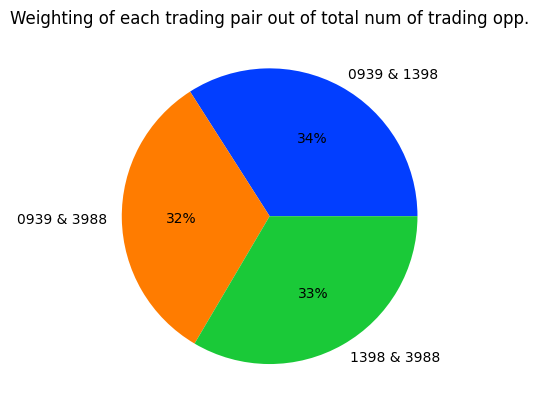

In [111]:
a = count_num_of_pair_trading_op('0939_rate','1398_rate')
b = count_num_of_pair_trading_op('0939_rate','3988_rate')
c = count_num_of_pair_trading_op('1398_rate','3988_rate')

data = [a,b,c]
labels = ['0939 & 1398 ', '0939 & 3988', '1398 & 3988']

colors = sns.color_palette('bright')

plt.title('Weighting of each trading pair out of total num of trading opp.')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# So we picked the pair 0939 & 1398 as there are more trading opp.